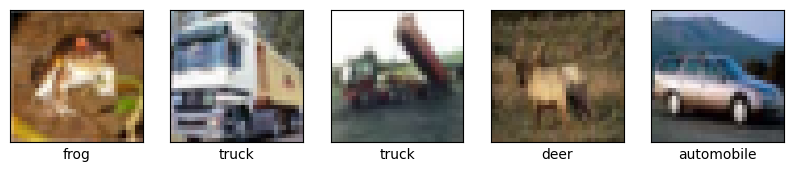


Forma de X_train (50000, 32, 32, 3)
Forma de y_train (50000, 1)
Forma de X_test (10000, 32, 32, 3)
Forma de y_test (10000, 1)
Rango de valores en pixeles: 0 a 255
Numero de clases: 10


In [17]:
#13/06/25
#importar librerias
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (X_test, y_test) = cifar10.load_data()

#obtener datos
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

#visualizar grafico
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()
print()
print("Forma de X_train", x_train.shape)
print("Forma de y_train", y_train.shape)
print("Forma de X_test", X_test.shape)
print("Forma de y_test", y_test.shape)
print("Rango de valores en pixeles:", np.min(x_train), "a", np.max(x_train))

num_classes = len(np.unique(y_train))
print("Numero de clases:", num_classes)

In [ ]:
#Normalizar y codificar etiquetas
import numpy as np
from tensorflow.keras.utils import to_categorical

X_train = x_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)



In [32]:
#Crea tu primera CNN para CIFAR-10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
 Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
 MaxPooling2D(pool_size=(2, 2)),
 Flatten(),
 Dense(64, activation='relu'),
 Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [33]:
# Compilar y entrenar el modelo usando el generador
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


ValueError: Arguments `target` and `output` must have the same shape. Received: target.shape=(None, 1), output.shape=(None, 10)

In [ ]:
# Evaluar en los datos de prueba
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Precisión en test: {test_acc:.4f}")